#Лабораторная работа №2

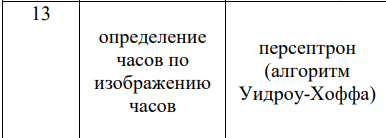

In [ ]:
import numpy as np
from random import random
import math
import os
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
from random import uniform as uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
network_layer = 3
neuron_count = [8, 5, 1]

In [ ]:
#Сигмовидная функция активации
def activate(x):
  return 1 / (1 + math.pow(math.e, -x))

In [ ]:
#Производная от сигмоидной фукции
def dy_activate(x):
  return activate(x) * (1 - activate(x))

In [ ]:
#Функция чтения датасета из colab
def ReadDataSet():
  y_key = [0, 1]
  x_set, y_set = [], []
  path = "/content/drive/My Drive/neural networks/lab2/"
  directory_name = ["wristwatch", "wallclock"]
  first_directory = path + directory_name[0]
  second_directory = path + directory_name[1]
  pathes = [first_directory, second_directory]

  size = (16, 16)
  for i in range(len(pathes)):
    files = listdir(pathes[i])
    for j in files:
      image = Image.open(pathes[i] + '/' + j)
      image = image.resize(size).convert('L')
      image = np.asarray(image) / 255
      x_set.append(image)
      y_set.append(y_key[i])
  return x_set, y_set

In [ ]:
#Функция для выводы картинок на экран
def outPutDataset(x_dataset, y_dataset):
  plt.figure(figsize = (26 , 6))
  for i in range(len(x_dataset)):
    plt.subplot(2 , 10 , i + 1)
    plt.title("Class: {0}".format(y_dataset[i]))
    plt.imshow(x_dataset[i], cmap = "gray")

In [ ]:
x_dataset, y_dataset = ReadDataSet()

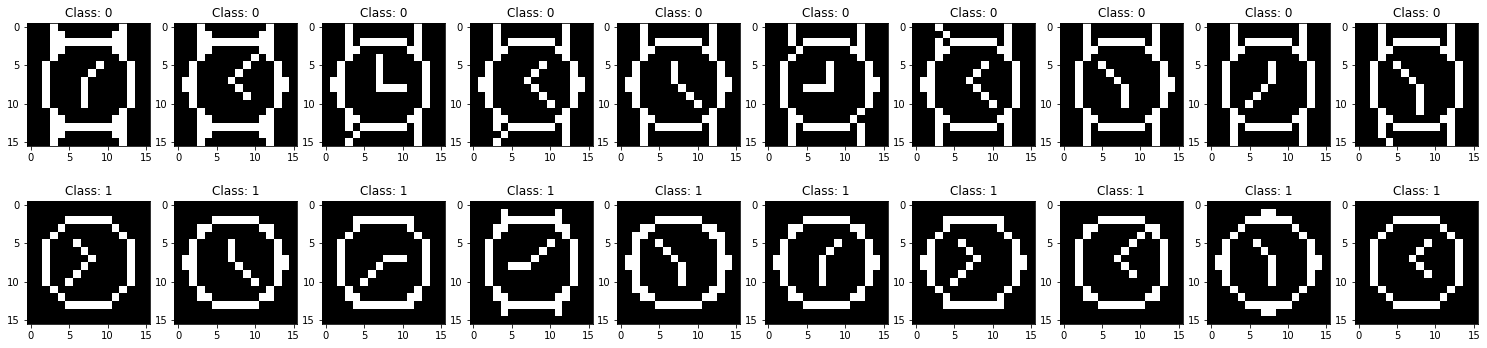

In [ ]:
outPutDataset(x_dataset, y_dataset)

In [ ]:
def get_reshaped(arr):
  for i in range(len(arr)):
    arr[i] = arr[i].reshape([-1])
    arr[i] = np.append(arr[i], 1)
  return arr

In [ ]:
def mini_batch(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify=y)
  
  print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
  print(f"Количество строк в y_test по классам: {np.bincount(y_test)}") 
  return x_train, y_train, x_test, y_test

In [ ]:
x_dataset = get_reshaped(x_dataset)

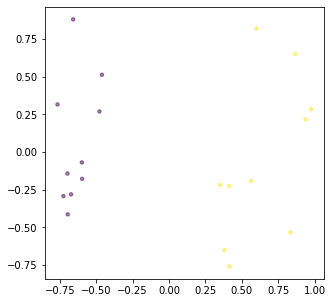

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_reduce = pca.fit_transform(x_dataset)

pca_x1 = pca_reduce[:, 0]
pca_x2 = pca_reduce[:, 1]

plt.figure(figsize=(5, 5))
plt.scatter(pca_x1 , pca_x2, s = 12 , c = y_dataset , alpha = 0.5)

In [ ]:
x_train, y_train, x_test, y_test = mini_batch(x_dataset, y_dataset)

Количество строк в y_train по классам: [8 8]
Количество строк в y_test по классам: [2 2]


#Функция для работы с весами

In [ ]:
#Функция вывода весов
def printWeight(weights, network_layer, neuron_count):
  for i in range(network_layer):
    print("Layer --------------------- {0}".format(i + 1))
    for j in range(neuron_count[i]):
      print("Neuron - {0}".format(j + 1))
      print(weights[i][j])

In [ ]:
#Функция генерирования рандомных весов
def generate_weight(size_of_first_layer, neuron_count):
  weights = []
  for i in range(network_layer):
    weight_layer = []
    for j in range(neuron_count[i]):
      weight_neuron = []

      if(i == 0):
        for m in range(size_of_first_layer):
          weight_neuron.append(uniform(-0.5, 0.5))
      else:
        for m in range(neuron_count[i - 1] + 1):
          weight_neuron.append(uniform(-0.5, 0.5))
      weight_layer.append(weight_neuron)
    weights.append(weight_layer)
  return weights

In [ ]:
weights = generate_weight(len(x_dataset[0]), neuron_count)
print(printWeight(weights, network_layer, neuron_count))

Layer --------------------- 1
Neuron - 1
[0.13803108898805772, -0.19674733390934562, -0.08150282727787417, 0.48931985267062617, 0.051362234105019944, 0.054963624768264996, 0.22478046015517295, 0.19610695773645626, -0.0012238996496111154, -0.19802001484643506, -0.2601816410119364, -0.2616332318370195, -0.26990037215014084, -0.09600804245108407, 0.4321298481830398, 0.10868059492490623, 0.3667785651829466, -0.18123488157204193, 0.4667396291250103, 0.06389843196197131, -0.1690366557670392, -0.4926677921412168, 0.15200056486536706, 0.4686348182154956, 0.15747338634096197, 0.4711074952799237, -0.10172988384030723, 0.09270533420315719, -0.28746976755752063, -0.12303259566923752, 0.21065763318099262, 0.4546693482867773, 0.28591751710178914, 0.4256181423252635, 0.15183779512913265, 0.24793270380361276, 0.1322018888599329, 0.10854647346652258, -0.2417311580096766, -0.06833592939799826, 0.24563015190689164, -0.2967079192236396, -0.24211280981506744, 0.1894349900432296, -0.002970306461051675, 0.16

In [ ]:
#Функция копирования значений весов
def weights_copy(weights):
  weights_copy = []
  for i in range(len(weights)):
    weights_layer = []
    for j in range(len(weights[i])):
      weights_neuron = []
      for m in range(len(weights[i][j])):
        weights_neuron.append(weights[i][j][m])
      weights_layer.append(weights_neuron)
    weights_copy.append(weights_layer)
  return weights_copy

In [ ]:
weights_dr = weights_copy(weights)
weights_bp = weights_copy(weights)

#Функция predict

In [ ]:
def predict2_0(weights, x_train, bias):
  output_value_by_every_layer = []
  input_value_by_every_layer = []
  for i in range(len(weights)):
    input_value_of_layer = []
    output_value_of_layer = []

    for j in range(len(weights[i])):
      output_value_neuron = 0

      if(i == 0):
        input_value_neuron = np.dot(weights[i][j], x_train)
      else:
        input_value_neuron = np.dot(weights[i][j], output_value_by_every_layer[i - 1])
      
      output_value_neuron = activate(input_value_neuron)
      output_value_of_layer.append(output_value_neuron)
      input_value_of_layer.append(input_value_neuron)

    if(i != len(weights) - 1):
      output_value_of_layer.append(bias)

    input_value_by_every_layer.append(input_value_of_layer)
    output_value_by_every_layer.append(output_value_of_layer)

    '''print("Layer {0}".format(i + 1))
    print("Input value")
    print(input_value_of_layer)
    print("Output value")
    print(output_value_of_layer)'''

  return input_value_by_every_layer, output_value_by_every_layer


#Функции Acc, Loss, вывода y-предсказанного

In [ ]:
#Функция расчета значений потери между y-предсказанным и y-тестовым
def err_loss(x_test, y_test, weights, bias):
  loss = 0
  last = len(weights) - 1
  for i in range(len(x_test)):
    y_inp, y_out = predict2_0(weights, x_test[i], bias)
    loss += np.square(y_out[last][0] - y_test[i])

  loss = np.sqrt(loss) / len(x_test)
  return loss

In [ ]:
#Функция расчета hitrate
def err_acc(x_test, y_test, weights, eps, bias):
  hit = 0
  last = len(weights) - 1
  for i in range(len(x_test)):
    y_inp, y_out = predict2_0(weights, x_test[i], bias)
    if(np.abs(y_out[last][0] - y_test[i]) < eps): hit = hit + 1
  return hit / len(x_test)

In [ ]:
#Функция вывода значений y-предсказанных
def y_out_print(weights, x_test, bias):
  last = len(weights) - 1
  print("y_out: ")
  for i in range(len(x_test)):
    y_predict_input, y_predict_output = predict2_0(weights, x_test[i], bias)
    print(y_predict_output[last][0])
  print("-----------------------------")

#Delta rule

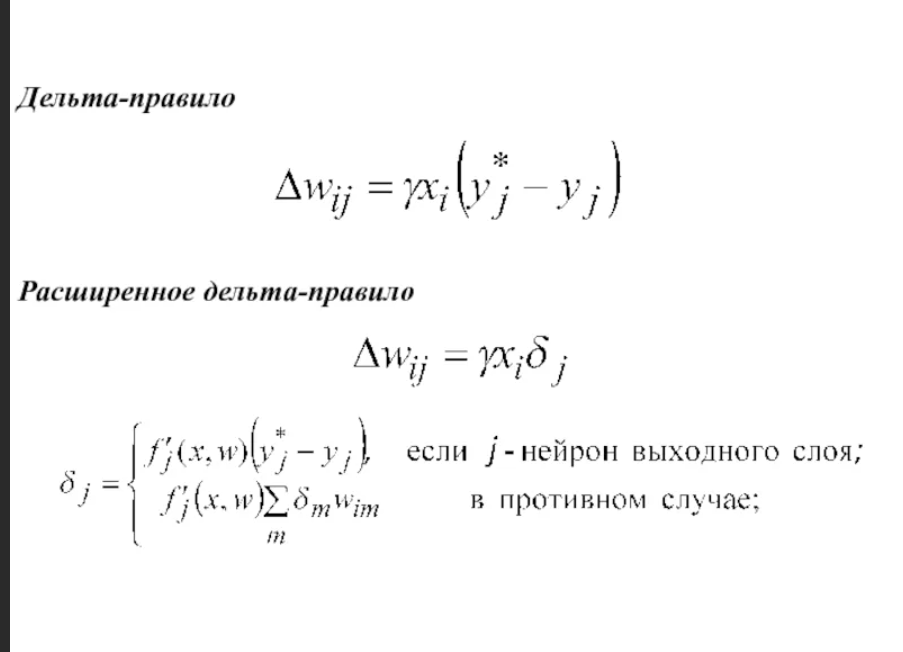

In [ ]:
def delta_rule(max_error, epoch, x_train, y_train, x_test, y_test, bias, a, weights):
  sigma_list = []
  for i in range(len(weights)):
    any_list = []
    for j in range(len(weights[i])):
      any_list.append(0)
    sigma_list.append(any_list)

  last_index = len(weights) - 1
  error = 0
  array_loss = []
  for i in range(epoch):
    err = 0
    print("Эпоха №{0}".format(i + 1))
    loss = err_loss(x_test, y_test, weights, bias)
    array_loss.append(loss)
    print("Loss: {0}".format(loss))
    print("Acc: {0}".format(err_acc(x_test, y_test, weights, 0.1, bias)))  

    for j in range(len(x_train)):
      input_value, output_value = predict2_0(weights, x_train[j], bias)
      #Выходной нейрон
      error = y_train[j] - output_value[last_index][0]
      g = dy_activate(input_value[last_index][0]) * error
      err += error ** 2
      sigma_list[last_index][0] = g
      for p in range(len(weights[last_index][0])):
        weights[last_index][0][p] += a * g * output_value[last_index - 1][p]
      
      #Скрытый слой
      for p in range(last_index - 1, -1, -1):
        for m in range(len(weights[p])):
          sigma = 0
          for k in range(len(weights[p + 1])):
            sigma += weights[p + 1][k][m] * sigma_list[p + 1][k]
          
          g = sigma * dy_activate(input_value[p][m])
          sigma_list[p][m] = g

          if(p == 0):
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * x_train[j][k]
          else:
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * output_value[p - 1][k]

    print("True: {0}".format(y_test))
    y_out_print(weights, x_test, bias)

    err = 0.5 * err
    if(err < max_error):
      print("Ошибка меньше заданной")
      break
  return weights, array_loss

In [ ]:
weights_dr, array_loss_dr = delta_rule(0.1, 1000, x_train, y_train, x_test, y_test, 1, 1, weights_dr)

Эпоха №1
Loss: 0.25097062475219767
Acc: 0.0
True: [1, 0, 1, 0]
y_out: 
0.4391237740322932
0.4433682217690708
0.4439839388927654
0.4452602010380974
-----------------------------
Эпоха №2
Loss: 0.25231032823788363
Acc: 0.0
True: [1, 0, 1, 0]
y_out: 
0.4296845051427257
0.4329487564109183
0.4343403919543885
0.43485390034808175
-----------------------------
Эпоха №3
Loss: 0.2527069815238482
Acc: 0.0
True: [1, 0, 1, 0]
y_out: 
0.4270120117621127
0.4294397213658421
0.43155145363384345
0.43138477358526317
-----------------------------
Эпоха №4
Loss: 0.252730128014385
Acc: 0.0
True: [1, 0, 1, 0]
y_out: 
0.4249958305133104
0.42668633764632535
0.429455592401608
0.4286861306024389
-----------------------------
Эпоха №5
Loss: 0.2527330292613387
Acc: 0.0
True: [1, 0, 1, 0]
y_out: 
0.4229243843867642
0.4239455665957849
0.4273358234351889
0.42601496862035504
-----------------------------
Эпоха №6
Loss: 0.2527571861219864
Acc: 0.0
True: [1, 0, 1, 0]
y_out: 
0.42073161844838514
0.42112475069072314
0.425

#Back propogation

In [ ]:
def back_Propogation2_0(weights, epoch, a, x_train, y_train, x_test, y_test, bias):
  sigma_list = []
  for i in range(len(weights)):
    any_list = []
    for j in range(len(weights[i])):
      any_list.append(0)
    sigma_list.append(any_list)

  last_index = len(weights) - 1
  error = 0
  array_loss = []
  for i in range(epoch):

    print("Эпоха №{0}".format(i+ 1))
    loss = err_loss(x_test, y_test, weights, bias)
    array_loss.append(loss)
    print("Loss: {0}".format(loss))
    print("Acc: {0}".format(err_acc(x_test, y_test, weights, 0.1, bias)))
    for j in range(len(x_train)):
      input_value, output_value = predict2_0(weights, x_train[j], bias)
      #Выходной нейрон
      error = y_train[j] - output_value[last_index][0]
      g = dy_activate(input_value[last_index][0]) * error
      sigma_list[last_index][0] = g

      for p in range(len(weights[last_index][0])):
        weights[last_index][0][p] += a * g * output_value[last_index - 1][p]
      
      #Скрытый слой
      for p in range(last_index - 1, -1, -1):
        for m in range(len(weights[p])):
          sigma = 0
          for k in range(len(weights[p + 1])):
            sigma += weights[p + 1][k][m] * sigma_list[p + 1][k]
          
          g = sigma * dy_activate(input_value[p][m])
          sigma_list[p][m] = g

          if(p == 0):
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * x_train[j][k]
          else:
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * output_value[p - 1][k]

    print("True: {0}".format(y_test))
    y_out_print(weights, x_test, bias)

  return weights, array_loss

In [ ]:
weights_bp, array_loss_bp = back_Propogation2_0(weights, 1000, 1, x_train, y_train, x_test, y_test, 1)

Выходные данные были обрезаны до нескольких последних строк (5000).
Эпоха №501
Loss: 0.009383109346312299
Acc: 1.0
True: [0, 1, 1, 0]
y_out: 
0.013490753026239923
0.9933387965603394
0.9727315389609095
0.020870593963544397
-----------------------------
Эпоха №502
Loss: 0.00937257538083544
Acc: 1.0
True: [0, 1, 1, 0]
y_out: 
0.013475594970195336
0.9933460832691392
0.9727618593549983
0.020846888954474008
-----------------------------
Эпоха №503
Loss: 0.009362075599656872
Acc: 1.0
True: [0, 1, 1, 0]
y_out: 
0.013460486416159538
0.9933533461566483
0.9727920822438436
0.020823261248954877
-----------------------------
Эпоха №504
Loss: 0.00935160981977486
Acc: 1.0
True: [0, 1, 1, 0]
y_out: 
0.013445427097580294
0.9933605853517264
0.9728222081452877
0.0207997104319787
-----------------------------
Эпоха №505
Loss: 0.009341177859551101
Acc: 1.0
True: [0, 1, 1, 0]
y_out: 
0.013430416749901603
0.9933678009822635
0.9728522375733424
0.02077623609163469
-----------------------------
Эпоха №506
Loss: 

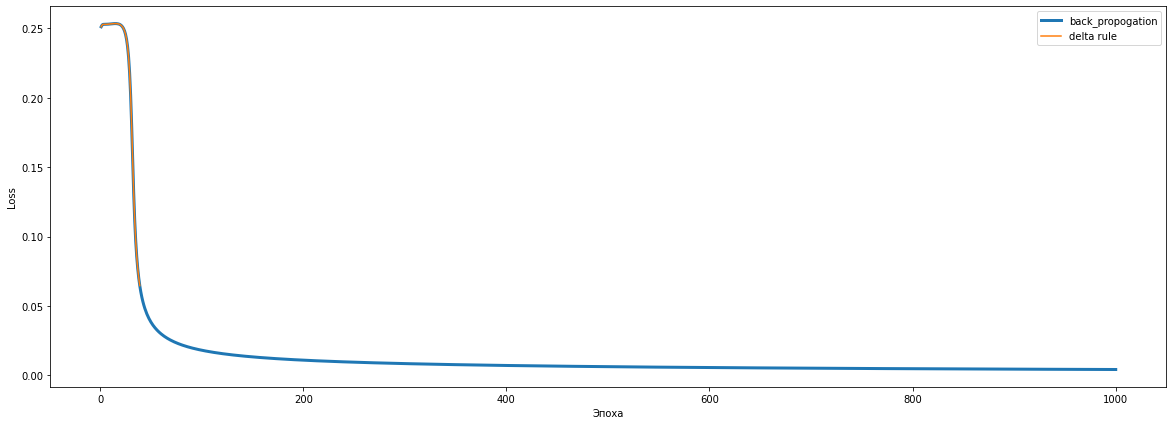

In [ ]:
plt.figure(figsize = (20, 7))
plt.plot(range(1 , len(array_loss_bp) + 1, 1), array_loss_bp, label = 'back_propogation', linewidth = 3)
plt.plot(range(1 , len(array_loss_dr) + 1, 1), array_loss_dr, label= 'delta rule')
plt.legend()
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.show()